# sequana_coverage test case example (fungus) 

This notebook creates the BED file provided in 
- https://github.com/sequana/resources/tree/master/coverage and
- https://www.synapse.org/#!Synapse:syn10638358/wiki/465309

**WARNING**: you need an account on synapse to get the FastQ files.

First, downloads 2 FastQ files from Synapse, its reference genome and its genbank annotation. Then, it performs the mapping using BWA to get a BAM file. The BAM file is converted to a BED, which is going to be one input file to our analysis. Finally, we use the coverage tool from Sequana project (i) with the standalone (sequana_coverage) and (ii) the Python library to analyse the BED file.

Versions used:
- sequana 0.5.0
- bwa mem 0.7.15
- bedtools 2.26.0
- samtools 1.5
- synapseclient 1.7.2

In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [10,7]

Populating the interactive namespace from numpy and matplotlib


# Download FastQ files

In [2]:
import synapseclient
l = synapseclient.login()
l.get("syn10641621", downloadLocation=".", ifcollision="overwrite.local")
l.get("syn10641896", downloadLocation=".", ifcollision="overwrite.local")

Welcome, Thomas Cokelaer!



## Download reference and annotation files

In [10]:
!sequana_coverage --download-reference CU329670.fa 
!sequana_coverage --download-reference CU329671.fa 
!sequana_coverage --download-reference CU329672.fa 
!sequana_coverage --download-reference X54421.fa 

INFO:root:Downloading reference CU329670.fa from ENA

INFO:root:Downloading reference CU329671.fa from ENA

INFO:root:Downloading reference CU329672.fa from ENA

INFO:root:Downloading reference X54421.fa from ENA



In [13]:
!sequana_coverage --download-genbank CU329670
!sequana_coverage --download-genbank CU329671
!sequana_coverage --download-genbank CU329672
!sequana_coverage --download-genbank X54421

INFO:root:Downloading genbank None from ENA

INFO:root:Downloading genbank None from ENA

INFO:root:Downloading genbank None from ENA

INFO:root:Downloading genbank None from ENA



In [26]:
!cat CU*gbk  X*gbk > S_pombe.gbk
!cat CU*.fa X*.fa> S_pombe.fa

The Reference must be altered to rename the header so that they 
agree with the genbank 

In [15]:
%%time
files = ['CU329670.fa', "CU329671.fa", "CU329672.fa", "X54421.fa"]
with open("S_pombe.fa", "w") as fout:
    for filename in files:
        with open(filename, "r") as fin  :
            for line in fin.readlines():
                if line.startswith(">"):
                    start, end = line.split(None, 1)
                    accession = start[1:].rsplit("|", 1)[1]
                    line = ">" + accession + " " + end
                fout.write(line)

CPU times: user 116 ms, sys: 30.8 ms, total: 146 ms
Wall time: 146 ms


In [21]:
# The mapping to obtain the BAM file
!time sequana_mapping \
    --file1 M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R1_001.fastq.gz \
    --file2 M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R2_001.fastq.gz \
    --reference S_pombe.fa --thread 4



Theoretical Depth of Coverage : 321.5617193567531
[bwa_index] Pack FASTA... 0.08 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 5.32 seconds elapse.
[bwa_index] Update BWT... 0.06 sec
[bwa_index] Pack forward-only FASTA... 0.04 sec
[bwa_index] Construct SA from BWT and Occ... 1.98 sec
[main] Version: 0.7.15-r1140
[main] CMD: bwa index S_pombe.fa
[main] Real time: 7.759 sec; CPU: 7.476 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 400000 sequences (40000000 bp)...
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (152, 179061, 18, 137)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (90, 140, 226)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 498)
[M::mem_pestat] mean and std.dev: (160.36, 94.83)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 634)
[M::mem_pestat] analyz

[M::mem_process_seqs] Processed 400000 reads in 20.092 CPU sec, 5.050 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (142, 178941, 15, 141)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (99, 158, 285)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 657)
[M::mem_pestat] mean and std.dev: (189.31, 126.22)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 843)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (149, 213, 301)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 605)
[M::mem_pestat] mean and std.dev: (232.08, 111.07)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 757)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (100, 158, 3

[M::mem_process_seqs] Processed 400000 reads in 22.700 CPU sec, 5.702 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (141, 178897, 12, 120)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (87, 146, 245)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 561)
[M::mem_pestat] mean and std.dev: (167.24, 100.37)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 719)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (150, 215, 303)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 609)
[M::mem_pestat] mean and std.dev: (233.80, 111.66)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 762)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (216, 448, 4

[M::mem_process_seqs] Processed 400000 reads in 22.259 CPU sec, 5.604 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (146, 179067, 14, 117)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (93, 143, 220)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 474)
[M::mem_pestat] mean and std.dev: (163.01, 96.85)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 601)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (150, 214, 303)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 609)
[M::mem_pestat] mean and std.dev: (233.26, 111.83)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 762)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (90, 191, 284

[M::mem_process_seqs] Processed 400000 reads in 21.419 CPU sec, 5.387 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (127, 179676, 14, 127)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (96, 155, 251)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 561)
[M::mem_pestat] mean and std.dev: (176.52, 107.31)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 716)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (147, 210, 295)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 591)
[M::mem_pestat] mean and std.dev: (228.20, 108.57)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 739)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (68, 234, 24

[M::mem_process_seqs] Processed 400000 reads in 23.776 CPU sec, 5.974 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (147, 178931, 19, 146)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (102, 174, 273)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 615)
[M::mem_pestat] mean and std.dev: (192.13, 122.56)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 786)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (151, 217, 306)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 616)
[M::mem_pestat] mean and std.dev: (235.60, 113.33)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 771)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (147, 267, 

[M::mem_process_seqs] Processed 400000 reads in 21.377 CPU sec, 5.371 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (156, 179319, 12, 123)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (87, 131, 203)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 435)
[M::mem_pestat] mean and std.dev: (143.16, 76.95)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 551)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (147, 210, 295)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 591)
[M::mem_pestat] mean and std.dev: (228.15, 108.49)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 739)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (122, 242, 42

[M::mem_process_seqs] Processed 400000 reads in 21.114 CPU sec, 5.309 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (150, 178975, 10, 102)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (110, 163, 245)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 515)
[M::mem_pestat] mean and std.dev: (175.51, 92.36)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 650)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (152, 217, 307)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 617)
[M::mem_pestat] mean and std.dev: (236.42, 113.56)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 772)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (185, 343, 6

[M::mem_process_seqs] Processed 400000 reads in 21.819 CPU sec, 5.497 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (139, 179271, 17, 113)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (94, 146, 229)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 499)
[M::mem_pestat] mean and std.dev: (161.79, 89.54)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 634)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (149, 213, 299)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 599)
[M::mem_pestat] mean and std.dev: (231.10, 110.11)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 749)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (168, 433, 38

In [ ]:
# Sort BAM files
! time samtools sort -@ 4 S_pombe.fa.bam -o S_pombe.fa.sorted.bam

# Build the BED file (unfiltered)
! time samtools depth -d 30000 S_pombe.fa.sorted.bam -aa > S_pombe.bed


In [ ]:
# Get a filtered BAM file as well
! time samtools view -@ 4 -q 35 -o S_pombe.fa.filtered_q35.bam S_pombe.fa.bam


# Sort BAM files
! time samtools sort -@ 4 S_pombe.fa.filtered_q35.bam -o S_pombe.fa.filtered_q35.sorted.bam


# Build the BED file ( filtered and unfiltered version)
! time samtools depth -d 30000 S_pombe.fa.sorted.bam S_pombe.fa.filtered_q35.sorted.bam  -aa > S_pombe.filtered.bed


In [2]:
%%time
from sequana import GenomeCov
b = GenomeCov("S_pombe.filtered.bed", "S_pombe.gbk")

CPU times: user 5.7 s, sys: 932 ms, total: 6.63 s
Wall time: 7.1 s


In [3]:
b.compute_gc_content("S_pombe.fa")

In [4]:
b.compute_coverage(20001)

/home/cokelaer/miniconda3/envs/py3/lib/python3.5/site-packages/matplotlib/mlab.py:1545: RuntimeWarning: divide by zero encountered in double_scalars
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)
/home/cokelaer/miniconda3/envs/py3/lib/python3.5/site-packages/matplotlib/mlab.py:1545: RuntimeWarning: invalid value encountered in multiply
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)


issue arised at iteration 0


/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:182: RuntimeWarning: divide by zero encountered in log
  res =  -1 * pylab.log(self.pdf(sample, params)).sum()


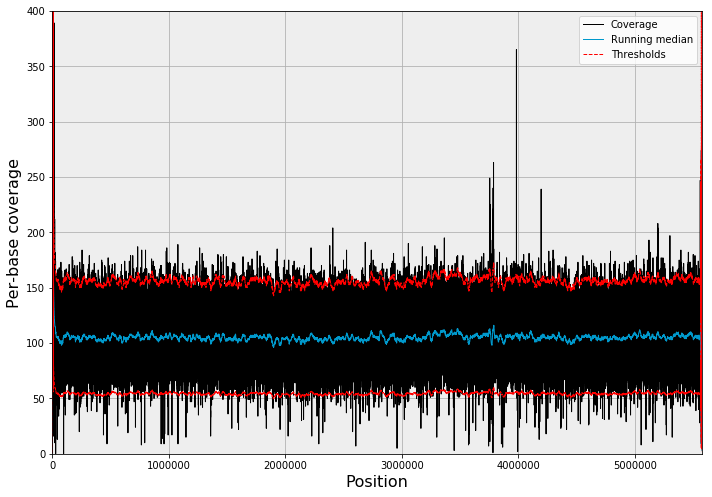

In [5]:
b.chr_list[0].plot_coverage()
_ = ylim([0, 400])

Computing 2D histogram. Please wait


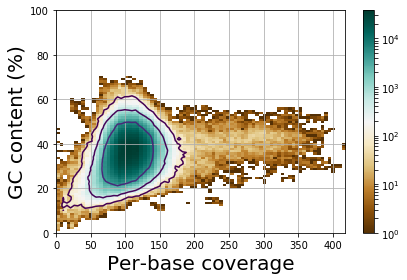

In [44]:
c.plot_gc_vs_coverage(cmap="BrBG", bins=[80, 69])